In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline


In [26]:
fake = pd.read_csv("Fake.csv")
true = pd.read_csv("True.csv")

In [27]:
fake.shape

(23481, 4)

In [28]:
true.shape

(21417, 4)

In [29]:
fake['target'] = 'fake'
true['target'] = 'true'

In [30]:
data = pd.concat([fake, true]).reset_index(drop = True)
data.shape

(44898, 5)

In [31]:
from sklearn.utils import shuffle
#shuffling data 
data = shuffle(data)
data = data.reset_index(drop=True)

In [32]:
data.head()

,title,text,subject,date,target
0,"In a sudden flurry, Trump looks to deliver for...","WASHINGTON (Reuters) - For the moment, U.S. Pr...",politicsNews,"October 13, 2017",true
1,Cruz adviser says Trump campaign taking 'banan...,WASHINGTON (Reuters) - A senior adviser to Rep...,politicsNews,"April 17, 2016",true
2,Ivanka Trump Sends Out #WorldRefugeeDay Tweet...,Ivanka Trump decided on Tuesday evening to sen...,News,"June 20, 2017",fake
3,Britain's Johnson congratulates PM May on Brex...,LONDON (Reuters) - British Foreign Secretary B...,worldnews,"December 8, 2017",true
4,Appeals court delays release of NJ's 'Bridgega...,NEW YORK (Reuters) - A U.S. appeals court on T...,politicsNews,"May 17, 2016",true


In [33]:
#removing date 
data.drop(["date"],axis=1,inplace=True)
data.head()

,title,text,subject,target
0,"In a sudden flurry, Trump looks to deliver for...","WASHINGTON (Reuters) - For the moment, U.S. Pr...",politicsNews,true
1,Cruz adviser says Trump campaign taking 'banan...,WASHINGTON (Reuters) - A senior adviser to Rep...,politicsNews,true
2,Ivanka Trump Sends Out #WorldRefugeeDay Tweet...,Ivanka Trump decided on Tuesday evening to sen...,News,fake
3,Britain's Johnson congratulates PM May on Brex...,LONDON (Reuters) - British Foreign Secretary B...,worldnews,true
4,Appeals court delays release of NJ's 'Bridgega...,NEW YORK (Reuters) - A U.S. appeals court on T...,politicsNews,true


In [34]:
#converting to lowercase 
data['text'] = data['text'].apply(lambda x: x.lower())
data.head()

,title,text,subject,target
0,"In a sudden flurry, Trump looks to deliver for...","washington (reuters) - for the moment, u.s. pr...",politicsNews,true
1,Cruz adviser says Trump campaign taking 'banan...,washington (reuters) - a senior adviser to rep...,politicsNews,true
2,Ivanka Trump Sends Out #WorldRefugeeDay Tweet...,ivanka trump decided on tuesday evening to sen...,News,fake
3,Britain's Johnson congratulates PM May on Brex...,london (reuters) - british foreign secretary b...,worldnews,true
4,Appeals court delays release of NJ's 'Bridgega...,new york (reuters) - a u.s. appeals court on t...,politicsNews,true


In [35]:
#removing stpwords

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\riju201299\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [36]:
data.head()

,title,text,subject,target
0,"In a sudden flurry, Trump looks to deliver for...","washington (reuters) - moment, u.s. president ...",politicsNews,true
1,Cruz adviser says Trump campaign taking 'banan...,washington (reuters) - senior adviser republic...,politicsNews,true
2,Ivanka Trump Sends Out #WorldRefugeeDay Tweet...,ivanka trump decided tuesday evening send twee...,News,fake
3,Britain's Johnson congratulates PM May on Brex...,london (reuters) - british foreign secretary b...,worldnews,true
4,Appeals court delays release of NJ's 'Bridgega...,new york (reuters) - u.s. appeals court tuesda...,politicsNews,true


subject
Government News     1570
Middle-east          778
News                9050
US_News              783
left-news           4459
politics            6841
politicsNews       11272
worldnews          10145
Name: text, dtype: int64


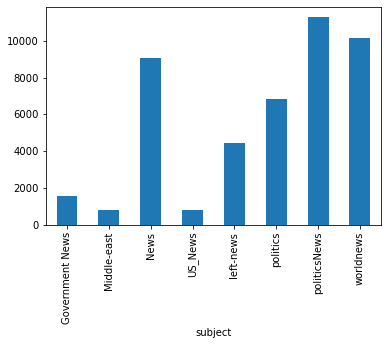

In [37]:
#number of articles persubject  

print(data.groupby(['subject'])['text'].count())
data.groupby(['subject'])['text'].count().plot(kind="bar")
plt.show()

target
fake    23481
true    21417
Name: text, dtype: int64


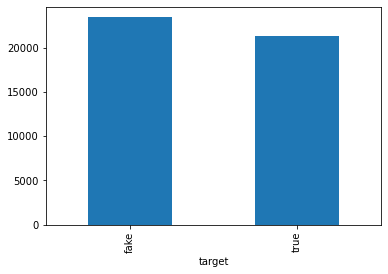

In [38]:
#no of fake and real articles 


print(data.groupby(['target'])['text'].count())
data.groupby(['target'])['text'].count().plot(kind="bar")
plt.show()

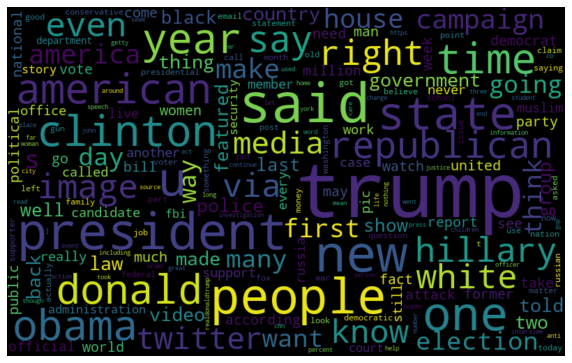

In [39]:
# Word cloud for fake news
!pip install wordcloud
from wordcloud import WordCloud


fake_data = data[data["target"] == "fake"]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

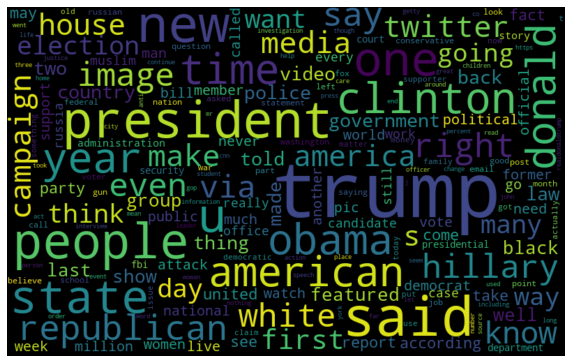

In [48]:
# Word cloud for real news
from wordcloud import WordCloud

real_data = data[data["target"] == "true"]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [49]:
!pip install nltk
from nltk import tokenize

token_space = tokenize.WhitespaceTokenizer()

def counter(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'blue')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()

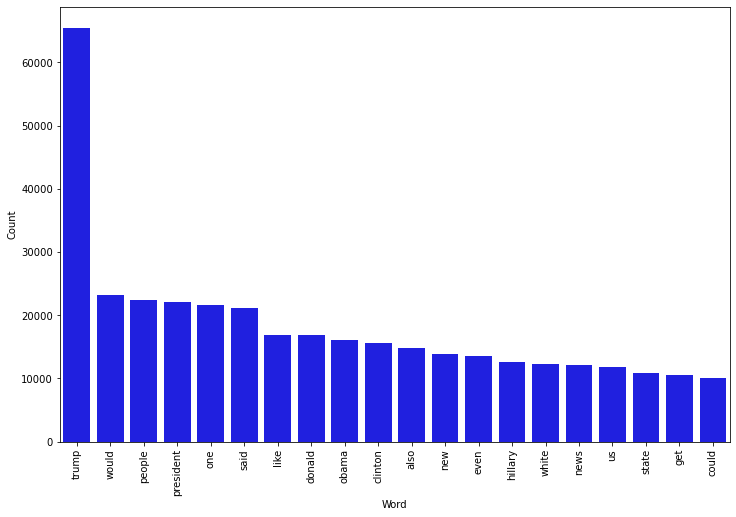

In [50]:
# Most frequent words in fake news
counter(data[data["target"] == "fake"], "text", 20)

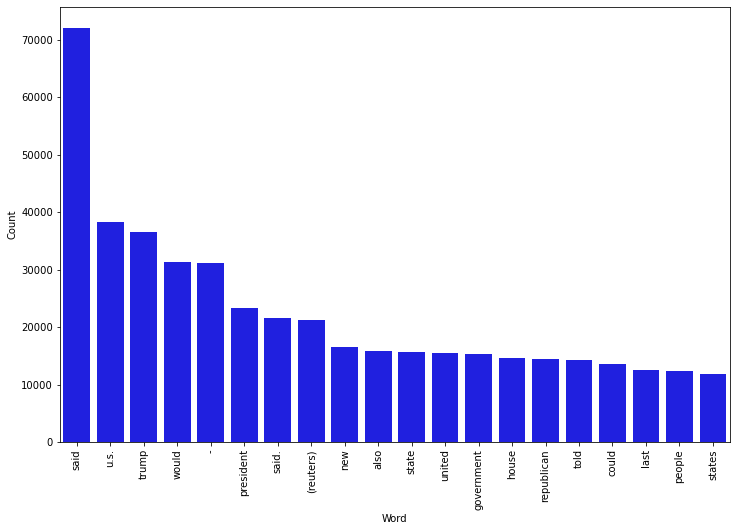

In [43]:
# Most frequent words in real news
counter(data[data["target"] == "true"], "text", 20)

In [55]:
# MODELING THE DATA 
from sklearn import metrics
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [56]:
# splitting the data 
X_train,X_test,y_train,y_test = train_test_split(data['text'], data.target, test_size=0.2, random_state=42)

In [57]:
#now we will use logistic regression 
# we will vectorize and aplly TF-IDF (TERM frequecy and inverse document frequency )
from sklearn.linear_model import LogisticRegression

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LogisticRegression())])

# Fitting the model
model = pipe.fit(X_train, y_train)

# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 98.86%


Confusion matrix, without normalization


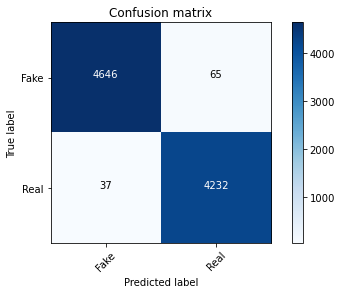

In [61]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])